In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load historical weather data
historical_weather = pd.read_csv('/content/drive/MyDrive/Competitions/Predicta/Predict-the-unpredictable/historical_weather.csv')

# Load sample submission data
sample_submission = pd.read_csv('/content/drive/MyDrive/Competitions/Predicta/Predict-the-unpredictable/sample_submission.csv')

# Load submission key data
submission_key = pd.read_csv('/content/drive/MyDrive/Competitions/Predicta/Predict-the-unpredictable/submission_key.csv')

In [ ]:
print(historical_weather.shape)
historical_weather.tail()

(182338, 9)


city_id        date  avg_temp_c  min_temp_c  max_temp_c  \
182333    C112  2018-12-27        22.0        15.9        27.9   
182334    C112  2018-12-28        21.9        14.9        28.2   
182335    C112  2018-12-29        22.4        16.3        28.2   
182336    C112  2018-12-30        21.6        18.5        26.6   
182337    C112  2018-12-31        20.2        17.1        25.0   

        precipitation_mm  snow_depth_mm  avg_wind_dir_deg  avg_wind_speed_kmh  
182333               0.0            NaN             100.0                13.2  
182334               0.0            NaN              91.0                12.6  
182335               0.0            NaN              61.0                14.2  
182336               1.6            NaN              70.0                17.0  
182337              17.5            NaN             103.0                12.6

In [ ]:
print(sample_submission.shape)
sample_submission.head()

(700, 2)


submission_ID  avg_temp_c
0              1         NaN
1              2         NaN
2              3         NaN
3              4         NaN
4              5         NaN

In [ ]:
print(submission_key.shape)
submission_key.head(5)

(700, 3)


submission_ID city_id        date
0              1    C001  2019-01-01
1              2    C001  2019-01-02
2              3    C001  2019-01-03
3              4    C001  2019-01-04
4              5    C001  2019-01-05

In [ ]:
historical_weather['date'] = pd.to_datetime(historical_weather['date'])

# Extract the year, month, and day from the date for filtering purposes
historical_weather['year'] = historical_weather['date'].dt.year
historical_weather['month'] = historical_weather['date'].dt.month
historical_weather['day'] = historical_weather['date'].dt.day

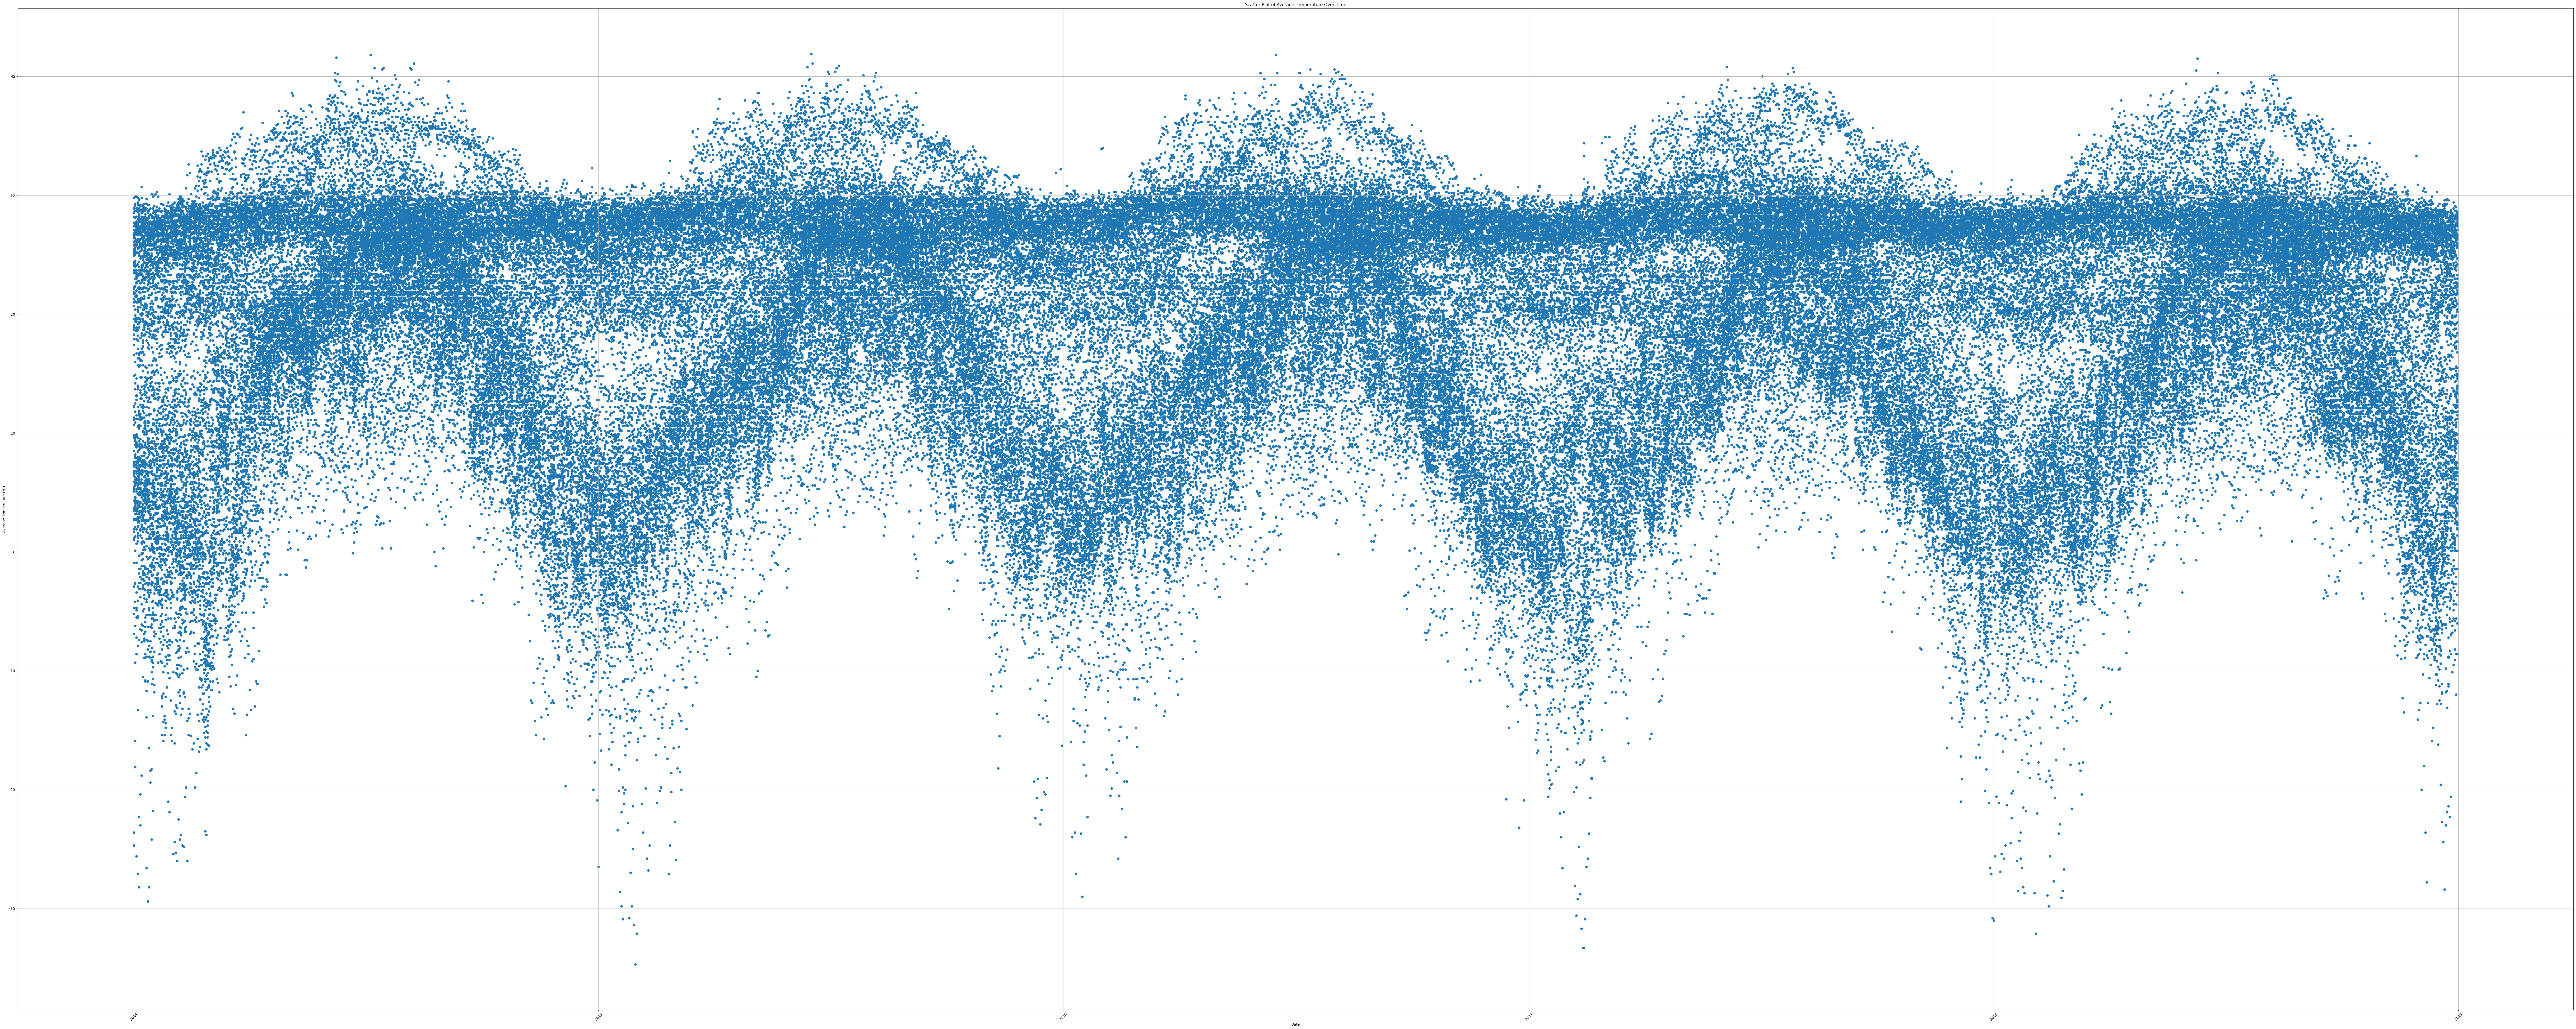

In [ ]:
plt.figure(figsize=(100, 40))  # Adjusting the figure size for better clarity
plt.scatter(historical_weather['date'], historical_weather['avg_temp_c'], marker='o')

# Adding titles and labels
plt.title("Scatter Plot of Average Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Average Temperature (°C)")

# Formatting the date on the x-axis for better readability
plt.xticks(rotation=45)

# Adding grid for better readability
plt.grid(True)

# Display the plot
plt.tight_layout()  # Adjust layout to ensure everything fits without overlap
plt.show()

In [ ]:
df=historical_weather[["city_id","year","month","day","avg_temp_c"]]

In [ ]:
print(df.shape)
df.head()

(182338, 5)


city_id  year  month  day  avg_temp_c
0    C001  2014      1    1         6.6
1    C001  2014      1    2         9.3
2    C001  2014      1    3         7.6
3    C001  2014      1    4         7.6
4    C001  2014      1    5         8.6

In [ ]:
df.isna().sum()

city_id          0
year             0
month            0
day              0
avg_temp_c    1224
dtype: int64

In [ ]:
# Convert 'year', 'month', and 'day' columns to datetime format
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Calculate average temperature for each month-day combination
avg_temp_by_month_day = df.groupby(df['date'].dt.strftime('%m-%d'))['avg_temp_c'].transform('mean')

# Replace null values in 'avg_temp_c' with corresponding month-day average
df['avg_temp_c'] = df['avg_temp_c'].fillna(avg_temp_by_month_day)

# Drop the 'date' column if no longer needed
df = df.drop(columns=['date'])

print("DataFrame with Null Values Replaced:")
print(df)


<ipython-input-12-feebbb5e8881>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df[['year', 'month', 'day']])


DataFrame with Null Values Replaced:
       city_id  year  month  day  avg_temp_c
0         C001  2014      1    1         6.6
1         C001  2014      1    2         9.3
2         C001  2014      1    3         7.6
3         C001  2014      1    4         7.6
4         C001  2014      1    5         8.6
...        ...   ...    ...  ...         ...
182333    C112  2018     12   27        22.0
182334    C112  2018     12   28        21.9
182335    C112  2018     12   29        22.4
182336    C112  2018     12   30        21.6
182337    C112  2018     12   31        20.2

[182338 rows x 5 columns]


<ipython-input-12-feebbb5e8881>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_temp_c'] = df['avg_temp_c'].fillna(avg_temp_by_month_day)


In [ ]:
df.isna().sum()

city_id       0
year          0
month         0
day           0
avg_temp_c    0
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

# Fit and transform the categorical column
encoded_columns = encoder.fit_transform(df[['city_id']])

# Create DataFrame from encoded columns with appropriate column names
categories = encoder.categories_[0]
encoded_df = pd.DataFrame(encoded_columns, columns=[f'city_id_{cat}' for cat in categories])


# Concatenate with original DataFrame
df= pd.concat([df, encoded_df], axis=1)

print("\nDataFrame after One-Hot Encoding:")
print(df)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



DataFrame after One-Hot Encoding:
       city_id  year  month  day  avg_temp_c  city_id_C001  city_id_C002  \
0         C001  2014      1    1         6.6           1.0           0.0   
1         C001  2014      1    2         9.3           1.0           0.0   
2         C001  2014      1    3         7.6           1.0           0.0   
3         C001  2014      1    4         7.6           1.0           0.0   
4         C001  2014      1    5         8.6           1.0           0.0   
...        ...   ...    ...  ...         ...           ...           ...   
182333    C112  2018     12   27        22.0           0.0           0.0   
182334    C112  2018     12   28        21.9           0.0           0.0   
182335    C112  2018     12   29        22.4           0.0           0.0   
182336    C112  2018     12   30        21.6           0.0           0.0   
182337    C112  2018     12   31        20.2           0.0           0.0   

        city_id_C003  city_id_C004  city_id_C005  ..

In [ ]:
df=df.drop(columns=["year","city_id"])
df

month  day  avg_temp_c  city_id_C001  city_id_C002  city_id_C003  \
0           1    1         6.6           1.0           0.0           0.0   
1           1    2         9.3           1.0           0.0           0.0   
2           1    3         7.6           1.0           0.0           0.0   
3           1    4         7.6           1.0           0.0           0.0   
4           1    5         8.6           1.0           0.0           0.0   
...       ...  ...         ...           ...           ...           ...   
182333     12   27        22.0           0.0           0.0           0.0   
182334     12   28        21.9           0.0           0.0           0.0   
182335     12   29        22.4           0.0           0.0           0.0   
182336     12   30        21.6           0.0           0.0           0.0   
182337     12   31        20.2           0.0           0.0           0.0   

        city_id_C004  city_id_C005  city_id_C007  city_id_C008  ...  \
0                0.0           0.0           0.0           0.0  ...   
1                0.0           0.0           0.0           0.0  ...   
2                0.0           0.0           0.0           0.0  ...   
3                0.0           0.0           0.0           0.0  ...   
4                0.0           0.0           0.0           0.0  ...   
...              ...           ...           ...           ...  ...   
182333           0.0           0.0           0.0           0.0  ...   
182334           0.0           0.0           0.0           0.0  ...   
182335           0.0           0.0           0.0           0.0  ...   
182336           0.0           0.0           0.0           0.0  ...   
182337           0.0           0.0           0.0           0.0  ...   

        city_id_C103  city_id_C104  city_id_C105  city_id_C106  city_id_C107  \
0                0.0           0.0           0.0           0.0           0.0   
1                0.0           0.0           0.0           0.0           0.0   
2                0.0           0.0           0.0           0.0           0.0   
3                0.0           0.0           0.0           0.0           0.0   
4                0.0           0.0           0.0           0.0           0.0   
...              ...           ...           ...           ...           ...   
182333           0.0           0.0           0.0           0.0           0.0   
182334           0.0           0.0           0.0           0.0           0.0   
182335           0.0           0.0           0.0           0.0           0.0   
182336           0.0           0.0           0.0           0.0           0.0   
182337           0.0           0.0           0.0           0.0           0.0   

        city_id_C108  city_id_C109  city_id_C110  city_id_C111  city_id_C112  
0                0.0           0.0           0.0           0.0           0.0  
1                0.0           0.0           0.0           0.0           0.0  
2                0.0           0.0           0.0           0.0           0.0  
3                0.0           0.0           0.0           0.0           0.0  
4                0.0           0.0           0.0           0.0           0.0  
...              ...           ...           ...           ...           ...  
182333           0.0           0.0           0.0           0.0           1.0  
182334           0.0           0.0           0.0           0.0           1.0  
182335           0.0           0.0           0.0           0.0           1.0  
182336           0.0           0.0           0.0           0.0           1.0  
182337           0.0           0.0           0.0           0.0           1.0  

[182338 rows x 103 columns]

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['avg_temp_c'],axis=1)
y=df["avg_temp_c"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from xgboost import XGBRegressor

XGBRegressor_model = XGBRegressor(
    objective='reg:squarederror',   # Use squared error for regression tasks
    eval_metric='rmse'              # Root Mean Squared Error as evaluation metric
)

# Fit the model on training data
XGBRegressor_model.fit(X_train, y_train)

# Predictions
y_pred = XGBRegressor_model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 11.84382947193307


In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1, random_state=42)

# Fit the model on training data
lasso_reg.fit(X_train, y_train)

# Predictions
y_pred = lasso_reg.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 89.50115616456677


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.0 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

# Initialize CatBoost Regressor
catboost_regressor = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, random_state=42)

# Fit the model on training data
catboost_regressor.fit(X_train, y_train, verbose=100)

# Predictions
y_pred = catboost_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error (MSE): {mse}")

0:	learn: 9.6475928	total: 66ms	remaining: 1m 5s
100:	learn: 5.8234726	total: 1.63s	remaining: 14.5s
200:	learn: 4.5161965	total: 3.19s	remaining: 12.7s
300:	learn: 3.7551034	total: 4.81s	remaining: 11.2s
400:	learn: 3.3256320	total: 7.07s	remaining: 10.6s
500:	learn: 3.0756498	total: 10.3s	remaining: 10.3s
600:	learn: 2.9292868	total: 11.9s	remaining: 7.93s
700:	learn: 2.8408790	total: 13.5s	remaining: 5.77s
800:	learn: 2.7814101	total: 15.1s	remaining: 3.75s
900:	learn: 2.7390527	total: 17.3s	remaining: 1.9s
999:	learn: 2.7083366	total: 18.9s	remaining: 0us

Mean Squared Error (MSE): 7.474976078704902


In [ ]:
import lightgbm as lgb

# Convert data into LightGBM dataset format
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Parameters for LightGBM
params = {
    'objective': 'regression',
    'metric': 'mse',
    'num_leaves': 31,
    'learning_rate': 0.1,
    'random_state': 42
}

# Train the model
num_round = 1000
lgb_model = lgb.train(params, train_data, num_boost_round=num_round, valid_sets=[test_data])

# Predictions
y_pred = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error (MSE): {mse}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002849 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 245
[LightGBM] [Info] Number of data points in the train set: 145870, number of used features: 102
[LightGBM] [Info] Start training from score 19.126726

Mean Squared Error (MSE): 7.082039069959741


In [ ]:
#code to improve lightGBM model

from sklearn.model_selection import GridSearchCV

# Initialize LightGBM regressor
lgb_reg = lgb.LGBMRegressor(random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'min_child_samples': [10, 20, 30],
    'reg_alpha': [0.1, 0.5],
    'reg_lambda': [0.1, 0.5]
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=lgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model and evaluate on test set
best_lgbm = grid_search.best_estimator_
y_pred = best_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Best Model Mean Squared Error (MSE): {mse}")

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize neural network model
model = Sequential()

# Add layers to the model
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
print("\nModel Summary:")
print(model.summary())

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_test), verbose=1)

# Predictions
y_pred = model.predict(X_test_scaled).reshape(-1)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error (MSE): {mse}")



Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                6592      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 8705 (34.00 KB)
Trainable params: 8705 (34.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
9117/9117 [==============================] - 27s 3ms/step - loss: 19.5194 - val_loss: 8.6815
Epoch 2/50
9117/9117 [==============================] - 20s 2ms/step - loss: 8.3545 - val_loss: 8.1311
Epoch 3/50
9117/9117 [==============================] - 19

In [ ]:
#Ensemble method

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

model1 = LinearRegression()
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model3 = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit models on training data
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

# Make predictions
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)

# Ensemble by averaging predictions
ensemble_pred = np.mean([pred1, pred2, pred3], axis=0)

# Calculate Mean Squared Error (MSE) for each model and ensemble
mse_model1 = mean_squared_error(y_test, pred1)
mse_model2 = mean_squared_error(y_test, pred2)
mse_model3 = mean_squared_error(y_test, pred3)
mse_ensemble = mean_squared_error(y_test, ensemble_pred)

# Print MSE for each model and ensemble
print(f"Linear Regression MSE: {mse_model1}")
print(f"Random Forest MSE: {mse_model2}")
print(f"Gradient Boosting MSE: {mse_model3}")
print(f"Ensemble MSE: {mse_ensemble}")

Linear Regression MSE: 40.161675988754254
Random Forest MSE: 9.488122582956986
Gradient Boosting MSE: 46.73101228755754
Ensemble MSE: 20.334372421100603


In [ ]:
submission_key['date'] = pd.to_datetime(submission_key['date'])

# Extract the year, month, and day from the date for filtering purposes
submission_key['year'] = submission_key['date'].dt.year
submission_key['month'] = submission_key['date'].dt.month
submission_key['day'] = submission_key['date'].dt.day



In [ ]:
encoder_1 = OneHotEncoder(sparse=False)

# Fit and transform the categorical column
encoded_columns_1 = encoder_1.fit_transform(submission_key[['city_id']])

# Create DataFrame from encoded columns with appropriate column names
categories = encoder_1.categories_[0]
encoded_df = pd.DataFrame(encoded_columns_1, columns=[f'city_id_{cat}' for cat in categories])


# Concatenate with original DataFrame
submission_key= pd.concat([submission_key, encoded_df], axis=1)

print("\nDataFrame after One-Hot Encoding:")
print(submission_key)


DataFrame after One-Hot Encoding:
     submission_ID city_id       date  year  month  day  city_id_C001  \
0                1    C001 2019-01-01  2019      1    1           1.0   
1                2    C001 2019-01-02  2019      1    2           1.0   
2                3    C001 2019-01-03  2019      1    3           1.0   
3                4    C001 2019-01-04  2019      1    4           1.0   
4                5    C001 2019-01-05  2019      1    5           1.0   
..             ...     ...        ...   ...    ...  ...           ...   
695            696    C112 2019-01-03  2019      1    3           0.0   
696            697    C112 2019-01-04  2019      1    4           0.0   
697            698    C112 2019-01-05  2019      1    5           0.0   
698            699    C112 2019-01-06  2019      1    6           0.0   
699            700    C112 2019-01-07  2019      1    7           0.0   

     city_id_C002  city_id_C003  city_id_C004  ...  city_id_C103  \
0             0.0   

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
submission_key=submission_key.drop(columns=["city_id","year","date"])
submission_key

submission_ID  month  day  city_id_C001  city_id_C002  city_id_C003  \
0                1      1    1           1.0           0.0           0.0   
1                2      1    2           1.0           0.0           0.0   
2                3      1    3           1.0           0.0           0.0   
3                4      1    4           1.0           0.0           0.0   
4                5      1    5           1.0           0.0           0.0   
..             ...    ...  ...           ...           ...           ...   
695            696      1    3           0.0           0.0           0.0   
696            697      1    4           0.0           0.0           0.0   
697            698      1    5           0.0           0.0           0.0   
698            699      1    6           0.0           0.0           0.0   
699            700      1    7           0.0           0.0           0.0   

     city_id_C004  city_id_C005  city_id_C007  city_id_C008  ...  \
0             0.0           0.0           0.0           0.0  ...   
1             0.0           0.0           0.0           0.0  ...   
2             0.0           0.0           0.0           0.0  ...   
3             0.0           0.0           0.0           0.0  ...   
4             0.0           0.0           0.0           0.0  ...   
..            ...           ...           ...           ...  ...   
695           0.0           0.0           0.0           0.0  ...   
696           0.0           0.0           0.0           0.0  ...   
697           0.0           0.0           0.0           0.0  ...   
698           0.0           0.0           0.0           0.0  ...   
699           0.0           0.0           0.0           0.0  ...   

     city_id_C103  city_id_C104  city_id_C105  city_id_C106  city_id_C107  \
0             0.0           0.0           0.0           0.0           0.0   
1             0.0           0.0           0.0           0.0           0.0   
2             0.0           0.0           0.0           0.0           0.0   
3             0.0           0.0           0.0           0.0           0.0   
4             0.0           0.0           0.0           0.0           0.0   
..            ...           ...           ...           ...           ...   
695           0.0           0.0           0.0           0.0           0.0   
696           0.0           0.0           0.0           0.0           0.0   
697           0.0           0.0           0.0           0.0           0.0   
698           0.0           0.0           0.0           0.0           0.0   
699           0.0           0.0           0.0           0.0           0.0   

     city_id_C108  city_id_C109  city_id_C110  city_id_C111  city_id_C112  
0             0.0           0.0           0.0           0.0           0.0  
1             0.0           0.0           0.0           0.0           0.0  
2             0.0           0.0           0.0           0.0           0.0  
3             0.0           0.0           0.0           0.0           0.0  
4             0.0           0.0           0.0           0.0           0.0  
..            ...           ...           ...           ...           ...  
695           0.0           0.0           0.0           0.0           1.0  
696           0.0           0.0           0.0           0.0           1.0  
697           0.0           0.0           0.0           0.0           1.0  
698           0.0           0.0           0.0           0.0           1.0  
699           0.0           0.0           0.0           0.0           1.0  

[700 rows x 103 columns]

In [ ]:
train_df=submission_key.drop("submission_ID",axis=1)
train_df

month  day  city_id_C001  city_id_C002  city_id_C003  city_id_C004  \
0        1    1           1.0           0.0           0.0           0.0   
1        1    2           1.0           0.0           0.0           0.0   
2        1    3           1.0           0.0           0.0           0.0   
3        1    4           1.0           0.0           0.0           0.0   
4        1    5           1.0           0.0           0.0           0.0   
..     ...  ...           ...           ...           ...           ...   
695      1    3           0.0           0.0           0.0           0.0   
696      1    4           0.0           0.0           0.0           0.0   
697      1    5           0.0           0.0           0.0           0.0   
698      1    6           0.0           0.0           0.0           0.0   
699      1    7           0.0           0.0           0.0           0.0   

     city_id_C005  city_id_C007  city_id_C008  city_id_C009  ...  \
0             0.0           0.0           0.0           0.0  ...   
1             0.0           0.0           0.0           0.0  ...   
2             0.0           0.0           0.0           0.0  ...   
3             0.0           0.0           0.0           0.0  ...   
4             0.0           0.0           0.0           0.0  ...   
..            ...           ...           ...           ...  ...   
695           0.0           0.0           0.0           0.0  ...   
696           0.0           0.0           0.0           0.0  ...   
697           0.0           0.0           0.0           0.0  ...   
698           0.0           0.0           0.0           0.0  ...   
699           0.0           0.0           0.0           0.0  ...   

     city_id_C103  city_id_C104  city_id_C105  city_id_C106  city_id_C107  \
0             0.0           0.0           0.0           0.0           0.0   
1             0.0           0.0           0.0           0.0           0.0   
2             0.0           0.0           0.0           0.0           0.0   
3             0.0           0.0           0.0           0.0           0.0   
4             0.0           0.0           0.0           0.0           0.0   
..            ...           ...           ...           ...           ...   
695           0.0           0.0           0.0           0.0           0.0   
696           0.0           0.0           0.0           0.0           0.0   
697           0.0           0.0           0.0           0.0           0.0   
698           0.0           0.0           0.0           0.0           0.0   
699           0.0           0.0           0.0           0.0           0.0   

     city_id_C108  city_id_C109  city_id_C110  city_id_C111  city_id_C112  
0             0.0           0.0           0.0           0.0           0.0  
1             0.0           0.0           0.0           0.0           0.0  
2             0.0           0.0           0.0           0.0           0.0  
3             0.0           0.0           0.0           0.0           0.0  
4             0.0           0.0           0.0           0.0           0.0  
..            ...           ...           ...           ...           ...  
695           0.0           0.0           0.0           0.0           1.0  
696           0.0           0.0           0.0           0.0           1.0  
697           0.0           0.0           0.0           0.0           1.0  
698           0.0           0.0           0.0           0.0           1.0  
699           0.0           0.0           0.0           0.0           1.0  

[700 rows x 102 columns]

In [ ]:
y_pred_fin=best_lgbm.predict(train_df)

In [ ]:
sample_submission["avg_temp_c"]=pd.DataFrame(y_pred_fin)

In [ ]:
sample_submission

submission_ID  avg_temp_c
0                1    7.792728
1                2    7.967621
2                3    7.878681
3                4    7.721393
4                5    7.559960
..             ...         ...
695            696   21.708646
696            697   21.726629
697            698   21.565196
698            699   21.558621
699            700   21.499662

[700 rows x 2 columns]

In [ ]:
csv_filename = 'prediction_3.0.csv'
sample_submission.to_csv(csv_filename, index=False)